In [21]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

alpha = sp.Symbol("alpha")
beta = sp.Symbol("beta")
H = sp.zeros(5)

H[0,0] = alpha
H[1,1] = alpha
H[2,2] = alpha
H[3,3] = alpha
H[4,4] = alpha

H[0,1] = beta
H[1,0] = beta
H[1,2] = beta
H[2,1] = beta
H[2,3] = beta
H[3,2] = beta
H[3,4] = beta
H[4,3] = beta
H[0,4] = beta
H[4,0] = beta

H



Matrix([
[alpha,  beta,     0,     0,  beta],
[ beta, alpha,  beta,     0,     0],
[    0,  beta, alpha,  beta,     0],
[    0,     0,  beta, alpha,  beta],
[ beta,     0,     0,  beta, alpha]])

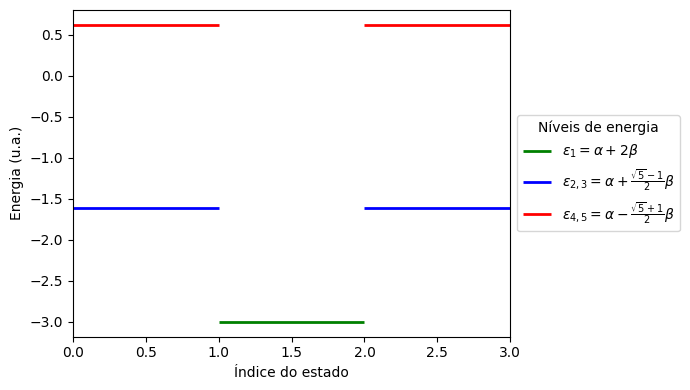


Determinante secular |H - E I| = 0 (forma polinomial, coeficientes racionais):
                  3                  
   5      4   17⋅E       2   17⋅E    
- E  - 2⋅E  + ───── + 6⋅E  - ──── - 4
                4             4      

Forma fatorada (se houver):
 ⎛   5      4       3       2            ⎞ 
-⎝4⋅E  + 8⋅E  - 17⋅E  - 24⋅E  + 17⋅E + 16⎠ 
───────────────────────────────────────────
                     4                     


<IPython.core.display.Math object>


Energias e ocupações (Oxazol, Hückel+QR):


,MO,Energy (β units),Occupancy
0,ψ1,-2.590952,2
1,ψ2,-1.359578,2
2,ψ3,-0.671037,2
3,ψ4,1.149664,0
4,ψ5,1.471903,0



Coeficientes dos MOs (base: O1,C2,N3,C4,C5):


,ψ1,ψ2,ψ3,ψ4,ψ5
O(1),0.718044,-0.532070,-0.083925,0.433169,0.081454
C(2),0.401366,0.115357,-0.542763,-0.678681,0.265326
N(3),0.321876,0.688907,-0.280289,0.347086,-0.471988
C(4),0.271661,0.476812,0.494823,0.106106,0.665388
C(5),0.381985,-0.040643,0.612334,-0.469072,-0.507399



Populações π (atômicas):


,Átomo,π-população
0,O(1),1.611459
1,C(2),0.937988
2,N(3),1.313518
3,C(4),1.092000
4,C(5),1.045035



Ordens de ligação π:


,Ligação,π-ordem
0,O1–C2,0.544744
1,C2–N3,0.721582
2,N3–C4,0.554454
3,C4–C5,0.774777
4,C5–O1,0.489035


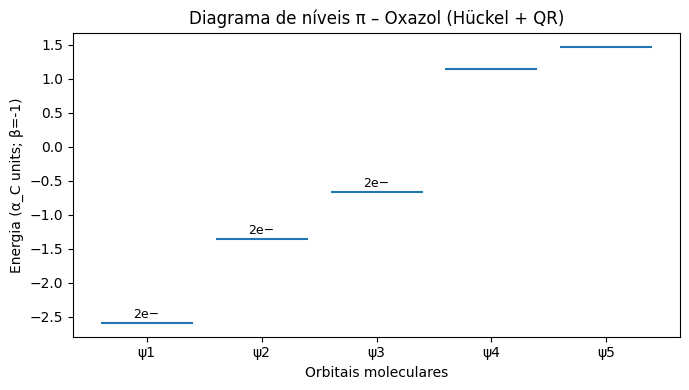

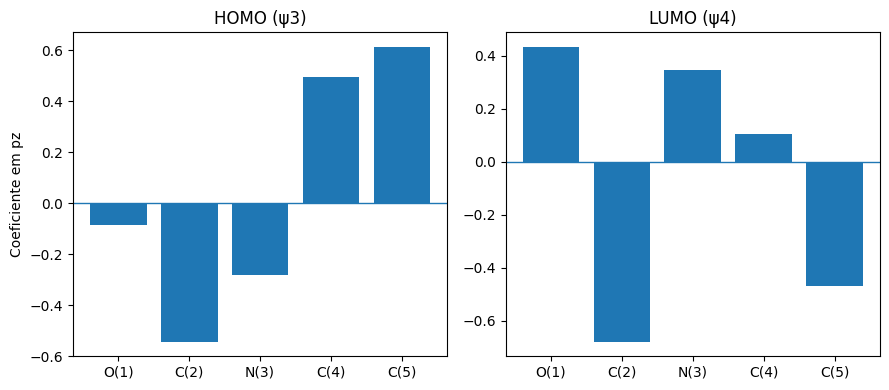

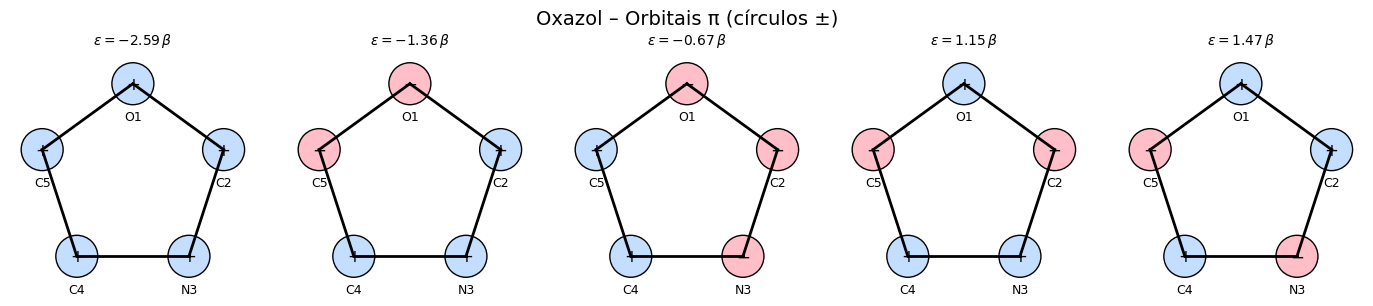

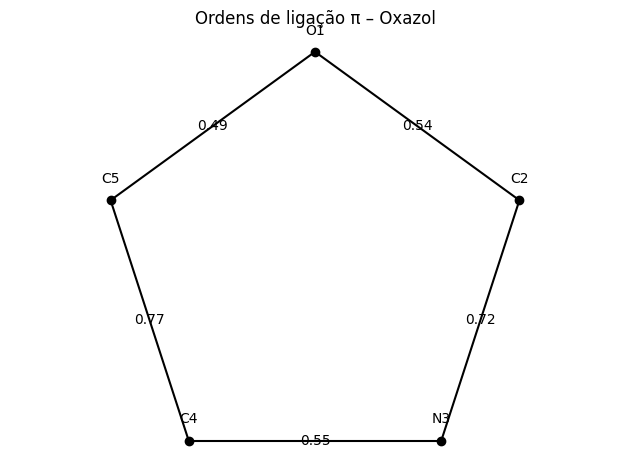

In [ ]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.patches import Circle
from IPython.display import display

# ------------------------------------------------------------------
# (anel n=5 homogêneo) — mantido para referência/validação
alpha = sp.Symbol("alpha")
beta  = sp.Symbol("beta")
H = sp.zeros(5)

H[0,0] = alpha
H[1,1] = alpha
H[2,2] = alpha
H[3,3] = alpha
H[4,4] = alpha

H[0,1] = beta; H[1,0] = beta
H[1,2] = beta; H[2,1] = beta
H[2,3] = beta; H[3,2] = beta
H[3,4] = beta; H[4,3] = beta
H[0,4] = beta; H[4,0] = beta

# Autovalores simbólicos (opcional)
_ = H.eigenvects(simplify=True)

# Valores numéricos para plot (anel homogêneo)
alpha_num = -1.0
beta_num  = -1.0
s5 = np.sqrt(5.0)
e1  = alpha_num + 2*beta_num
e23 = alpha_num + ((s5 - 1)/2.0)*beta_num
e45 = alpha_num - ((s5 + 1)/2.0)*beta_num

# --- Diagrama de níveis --- (cores iguais ao exemplo)
plt.figure(figsize=(7,4))

# nível mais baixo (ocupado) em verde
plt.hlines(e1, 1, 2, colors='green', linewidth=2, label=r'$\varepsilon_1 = \alpha + 2\beta$')

# par degenerado k=±1 (ocupado) também em azul
plt.hlines(e23, 0, 1, colors='blue', linewidth=2, label=r'$\varepsilon_{2,3} = \alpha + \frac{\sqrt{5}-1}{2}\beta$')
plt.hlines(e23, 2, 3, colors='blue', linewidth=2)

# par degenerado k=±2 (desocupado) em vermelho
plt.hlines(e45, 0, 1, colors='red', linewidth=2, label=r'$\varepsilon_{4,5} = \alpha - \frac{\sqrt{5}+1}{2}\beta$')
plt.hlines(e45, 2, 3, colors='red', linewidth=2)

plt.xlim(0, 3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title="Níveis de energia")
plt.xlabel("Índice do estado")
plt.ylabel("Energia (u.a.)")
plt.tight_layout()
plt.show()


# ------------------------------------------------------------------
# PARTE OXAZOL — Hückel (pz) + QR (sem funções), numeração: 1=O, 2=C, 3=N, 4=C, 5=C (sentido horário)
labels = ["O(1)", "C(2)", "N(3)", "C(4)", "C(5)"]

# Parâmetros de Hückel (unidades de β; convencionais simples tipo Streitwieser)
beta = -1.0
alpha_C = 0.0        # tomamos α_C como referência
alpha_O = alpha_C + 1.5*beta
alpha_N = alpha_C + 0.5*beta

# Matriz de Hückel do oxazol (apenas pz; vizinhos mais próximos)
H_ox = np.array([[alpha_O, beta,     0.0,  0.0,  beta],
                 [beta,    alpha_C,  beta, 0.0,  0.0 ],
                 [0.0,     beta,     alpha_N, beta, 0.0],
                 [0.0,     0.0,      beta, alpha_C, beta],
                 [beta,    0.0,      0.0,  beta, alpha_C]], dtype=float)

# --- Determinante secular (bonito) ---
from IPython.display import display, Math

E = sp.Symbol('E')
H_sym = sp.Matrix(H_ox.tolist())

# det(H - E I)
secular = (H_sym - E*sp.eye(5)).det()

# Limpar/fixar forma
secular_simpl   = sp.simplify(secular)
secular_exp     = sp.expand(secular_simpl)
secular_rat     = sp.nsimplify(secular_exp, rational=True)  # coeficientes racionais
secular_fact    = sp.factor(secular_rat)

print("\nDeterminante secular |H - E I| = 0 (forma polinomial, coeficientes racionais):")
sp.pretty_print(secular_rat)

print("\nForma fatorada (se houver):")
sp.pretty_print(secular_fact)

# Versão em LaTeX (se estiver no Jupyter, aparece renderizada)
try:
    display(Math(r"\det(\mathbf{H}-E\mathbf{I}) = " + sp.latex(secular_rat)))
except Exception:
    pass


# --- Diagonalização por QR com deslocamento de Wilkinson (sem funções) ---
A = H_ox.copy()
n = 5
Q_total = np.eye(n)
for _ in range(10000):
    off = np.sqrt(np.sum(np.tril(A,-1)**2 + np.triu(A,1)**2))
    if off < 1e-12:
        break
    d = (A[n-2,n-2] - A[n-1,n-1]) / 2.0
    sign = 1.0 if d >= 0 else -1.0
    mu = A[n-1,n-1] - sign * (A[n-1,n-2]**2) / (abs(d) + np.sqrt(d*d + A[n-1,n-2]**2))
    Q, R = np.linalg.qr(A - mu*np.eye(n))
    A = R @ Q + mu*np.eye(n)
    Q_total = Q_total @ Q

eigvals = np.diag(A)
order = np.argsort(eigvals)
eigvals = eigvals[order]
eigvecs = Q_total[:, order]
for j in range(n):
    eigvecs[:,j] /= np.linalg.norm(eigvecs[:,j])

# --- Preenchimento eletrônico (6 π elétrons → 3 MOs ocupados)
n_elec = 6
n_occ  = n_elec // 2

# Tabelas
energies = pd.DataFrame({
    "MO": [f"ψ{i+1}" for i in range(5)],
    "Energia (β units)": eigvals,
    "Ocupação": ["2" if i < n_occ else "0" for i in range(5)]
})
coeffs = pd.DataFrame(eigvecs, index=labels, columns=[f"ψ{i+1}" for i in range(5)])

print("\nEnergias e ocupações (Oxazol, Hückel+QR):")
display(energies.round(6))
print("\nCoeficientes dos MOs (base: O1,C2,N3,C4,C5):")
display(coeffs.round(6))

# --- Populações π e ordens de ligação π
pop = 2.0 * np.sum(eigvecs[:, :n_occ]**2, axis=1)
pairs = [(0,1), (1,2), (2,3), (3,4), (4,0)]
pair_labels = ["O1–C2", "C2–N3", "N3–C4", "C4–C5", "C5–O1"]

bond_orders = []
for (i,j), lab in zip(pairs, pair_labels):
    Pij = 2.0 * np.sum(eigvecs[i, :n_occ] * eigvecs[j, :n_occ])
    bond_orders.append((lab, Pij))

print("\nPopulações π (atômicas):")
display(pd.DataFrame({"Átomo": labels, "π-população": pop}).round(6))
print("\nOrdens de ligação π:")
display(pd.DataFrame(bond_orders, columns=["Ligação","π-ordem"]).round(6))

# --- Diagrama de níveis do oxazol + ocupação
plt.figure(figsize=(7,4))
x = np.arange(1,6)
for i in range(5):
    y = eigvals[i]
    plt.hlines(y, x[i]-0.4, x[i]+0.4)
    if i < n_occ:
        plt.text(x[i], y+0.03, "2e−", ha='center', va='bottom', fontsize=9)
plt.xticks(x, [f"ψ{i}" for i in range(1,6)])
plt.xlabel("Orbitais moleculares")
plt.ylabel("Energia (α_C units; β=-1)")
plt.title("Diagrama de níveis π – Oxazol (Hückel + QR)")
plt.tight_layout()
plt.show()

# --- Esboços HOMO/LUMO como barras de coeficientes (sinal e magnitude)
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(np.arange(5), eigvecs[:,2], tick_label=labels)
plt.axhline(0, linewidth=1)
plt.title("HOMO (ψ3)"); plt.ylabel("Coeficiente em pz")
plt.subplot(1,2,2)
plt.bar(np.arange(5), eigvecs[:,3], tick_label=labels)
plt.axhline(0, linewidth=1)
plt.title("LUMO (ψ4)")
plt.tight_layout()
plt.show()

# --- “Círculos +/−” (estilo do exemplo) para os 5 MOs
theta = np.deg2rad(np.array([90, 18, -54, -126, 162]))
R = 1.0
xy = np.c_[R*np.cos(theta), R*np.sin(theta)]

fig, axes = plt.subplots(1,5, figsize=(14,3))
simple_labels = ["O1","C2","N3","C4","C5"]
for k, ax in enumerate(axes):
    # ligações do anel
    for i in range(5):
        j = (i+1)%5
        ax.plot([xy[i,0], xy[j,0]], [xy[i,1], xy[j,1]], lw=2, color="black")
    # círculos de fase fixos
    for i,(x0,y0) in enumerate(xy):
        sgn = 1 if eigvecs[i,k] >= 0 else -1
        color = (0.73,0.85,1.0,0.85) if sgn>0 else (1.0,0.7,0.75,0.85)
        circ = Circle((x0,y0), radius=0.22, facecolor=color, edgecolor='black', linewidth=1.0)
        ax.add_patch(circ)
        ax.text(x0, y0, '+' if sgn>0 else '−', ha='center', va='center', fontsize=12)
        ax.text(x0, y0-0.28, simple_labels[i], ha='center', va='top', fontsize=9)
    ax.set_aspect('equal'); ax.axis('off')
    ax.set_title(rf"$\varepsilon = {eigvals[k]:.2f}\,\beta$", fontsize=10)
fig.suptitle("Oxazol – Orbitais π (círculos ±)", fontsize=14)
plt.tight_layout()
plt.show()

# --- Mapa do anel com ordens de ligação sobre cada ligação
plt.figure()
for i in range(5):
    j = (i+1)%5
    plt.plot([xy[i,0], xy[j,0]], [xy[i,1], xy[j,1]], color="black")
for (i,j),(lab, Pij) in zip(pairs, bond_orders):
    xm, ym = (xy[i]+xy[j])/2
    plt.text(xm, ym, f"{Pij:.2f}", ha='center', va='center')
for i,(x0,y0) in enumerate(xy):
    plt.scatter(x0,y0, color="black"); plt.text(x0, y0+0.08, simple_labels[i], ha='center')
plt.axis('equal'); plt.axis('off')
plt.title("Ordens de ligação π – Oxazol")
plt.tight_layout()
plt.show()
